# CLASSIFICATION OF DOCUMENTOS

## 1. BUSINESS UNDERSTANDING

### 1.1. Business objectives
Avoid misclassifications in stored legal documents.

### 1.2. Assess situation
A public manager needs to ensure that all documents stored by employees are correctly classified to avoid future problems with the collection. Dealing with the difficulty of checking each document, there is a need for a tool to indicate possible misclassifications. For this, a sample of the collection of documents was given with their due classifications.

### 1.3. Project goals
This project intends to build a document classifier model with Natural Language Processing using machine learning algorithms.

## 2. DATA UNDERSTANDING

### 2.1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

### 2.2. Data loading

In [2]:
df_raw = pd.read_csv('../data/dataset_despachos_9vc.csv')
df_raw

,ids,data_disponibilizacao,orgao_julgador,numero_processo,nome_classe,codigo_classe,texto
0,6417056,2021-06-29,9ª Vara Cível de São Luís,8227435120198100001,CUMPRIMENTO DE SENTENçA,156,Juízo de Direito da 9ª Vara Cível do Termo de ...
1,6428799,2021-06-29,9ª Vara Cível de São Luís,8213529020218100001,CUMPRIMENTO PROVISóRIO DE SENTENçA,157,Juízo de Direito da 9ª Vara Cível deo Termo de...
2,6429036,2021-06-29,9ª Vara Cível de São Luís,8335414220178100001,PROCEDIMENTO COMUM CíVEL,7,Juízo de Direito da 9ª Vara Cível deo Termo de...
3,6429037,2021-06-29,9ª Vara Cível de São Luís,8335414220178100001,PROCEDIMENTO COMUM CíVEL,7,Juízo de Direito da 9ª Vara Cível do Termo de ...
4,6286799,2021-06-25,9ª Vara Cível de São Luís,8490216020178100001,PROCEDIMENTO COMUM CíVEL,7,Juízo de Direito da 9ª Vara Cível do Termo de ...
...,...,...,...,...,...,...,...
896,59076,2021-01-13,9ª Vara Cível de São Luís,8246644520198100001,EMBARGOS à EXECUçãO,172,Juízo de Direito da 9ª Vara Cível deo Termo de...
897,49055,2021-01-12,9ª Vara Cível de São Luís,8266535720178100001,PROCEDIMENTO COMUM CíVEL,7,Juízo de Direito da 9ª Vara Cível deo Termo de...
898,49253,2021-01-12,9ª Vara Cível de São Luís,8330442320208100001,BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA,81,Juízo de Direito da 9ª Vara Cível deo Termo de...
899,49266,2021-01-12,9ª Vara Cível de São Luís,8266708820208100001,BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA,81,Juízo de Direito da 9ª Vara Cível deo Termo de...


In [3]:
# Viewing the classes
df_raw.groupby('nome_classe').size()

nome_classe
AçãO DE EXIGIR CONTAS                                       1
BUSCA E APREENSãO                                           1
BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA                  84
CARTA PRECATóRIA CíVEL                                      2
CAUTELAR INOMINADA                                          4
CONSIGNAçãO EM PAGAMENTO                                    6
CUMPRIMENTO DE SENTENçA                                   195
CUMPRIMENTO PROVISóRIO DE DECISãO                           1
CUMPRIMENTO PROVISóRIO DE SENTENçA                          5
DESPEJO                                                     1
DESPEJO POR FALTA DE PAGAMENTO                              2
DESPEJO POR FALTA DE PAGAMENTO CUMULADO COM COBRANçA        4
EMBARGOS DE TERCEIRO CíVEL                                  4
EMBARGOS à EXECUçãO                                         7
EXECUçãO DE TíTULO EXTRAJUDICIAL                           72
INCIDENTE DE DESCONSIDERAçãO DE PERSONALIDADE JURíDICA    

## 3. DATA PREPARATION

### 3.1. Select data

In [4]:
# Filtering to get only classes of interest
classes_of_interest = ['BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA',
                       'CUMPRIMENTO DE SENTENçA',
                       'EXECUçãO DE TíTULO EXTRAJUDICIAL',
                       'MONITóRIA',
                       'PROCEDIMENTO COMUM CíVEL']

df = df_raw.loc[df_raw['nome_classe'].isin(classes_of_interest), ['texto', 'nome_classe']].copy()
df.groupby('nome_classe').size()

nome_classe
BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA     84
CUMPRIMENTO DE SENTENçA                      195
EXECUçãO DE TíTULO EXTRAJUDICIAL              72
MONITóRIA                                     76
PROCEDIMENTO COMUM CíVEL                     404
dtype: int64

In [5]:
display(df)

,texto,nome_classe
0,Juízo de Direito da 9ª Vara Cível do Termo de ...,CUMPRIMENTO DE SENTENçA
2,Juízo de Direito da 9ª Vara Cível deo Termo de...,PROCEDIMENTO COMUM CíVEL
3,Juízo de Direito da 9ª Vara Cível do Termo de ...,PROCEDIMENTO COMUM CíVEL
4,Juízo de Direito da 9ª Vara Cível do Termo de ...,PROCEDIMENTO COMUM CíVEL
6,Juízo de Direito da 9ª Vara Cível do Termo de ...,MONITóRIA
...,...,...
894,Juízo de Direito da 9ª Vara Cível do Termo de ...,BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA
897,Juízo de Direito da 9ª Vara Cível deo Termo de...,PROCEDIMENTO COMUM CíVEL
898,Juízo de Direito da 9ª Vara Cível deo Termo de...,BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA
899,Juízo de Direito da 9ª Vara Cível deo Termo de...,BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA


### 3.2. Clean data

In [6]:
# Removing header (all text before the word "despacho")
df['texto'] = df['texto'].apply(lambda x: x.lower().split('despacho')[1])

## 4. MODELING

### 4.1. Split dataset into train and test

In [7]:
X = df['texto']
y = df['nome_classe']

xtraining, xtesting, ytraining, ytesting = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
print(xtraining.shape)
print(xtesting.shape)

(747,)
(84,)


### 4.2. Preprocessing with TFIDF

In [8]:
# Loading de stop words em portuguese
stop_words_portuguese = stopwords.words('portuguese')

In [9]:
# Preprocessing with TFIDF
tfidf = TfidfVectorizer(max_df=0.90, min_df=30, stop_words=stop_words_portuguese)
X_train = tfidf.fit_transform(xtraining)
X_test  = tfidf.transform(xtesting)
y_train = ytraining
y_test  = ytesting

In [10]:
X_train

<747x552 sparse matrix of type '<class 'numpy.float64'>'
	with 62243 stored elements in Compressed Sparse Row format>

In [11]:
X_test

<84x552 sparse matrix of type '<class 'numpy.float64'>'
	with 6981 stored elements in Compressed Sparse Row format>

In [12]:
y_test.value_counts()

PROCEDIMENTO COMUM CíVEL                     41
CUMPRIMENTO DE SENTENçA                      20
MONITóRIA                                     8
BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA     8
EXECUçãO DE TíTULO EXTRAJUDICIAL              7
Name: nome_classe, dtype: int64

### 4.3. Build models

### 4.3.1. K Nearst Neighbors

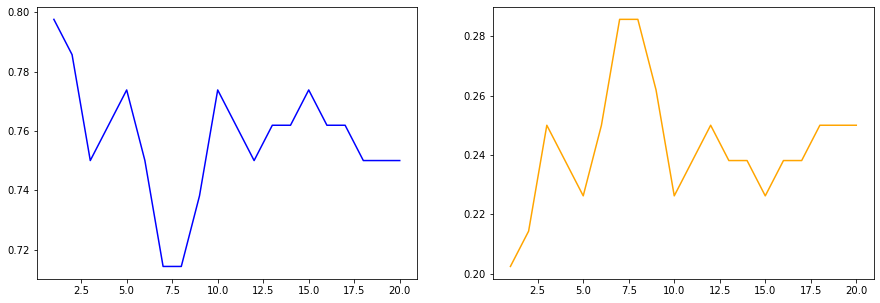

In [13]:
# Finding best parameters
accuracy_rate = []
error_rate = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_rate.append(accuracy_score(y_test, y_pred))
    error_rate.append(np.mean(y_pred != y_test))

# Plotting accuracy and error by each parameter
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x=range(1, 21), y=accuracy_rate, color='blue', ax=axes[0])
sns.lineplot(x=range(1, 21), y=error_rate, color='orange', ax=axes[1])

In [14]:
# Training and Prediction
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

                                           precision    recall  f1-score   support

BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA       1.00      0.62      0.77         8
                  CUMPRIMENTO DE SENTENçA       0.77      0.85      0.81        20
         EXECUçãO DE TíTULO EXTRAJUDICIAL       0.67      0.86      0.75         7
                                MONITóRIA       0.50      0.75      0.60         8
                 PROCEDIMENTO COMUM CíVEL       0.92      0.80      0.86        41

                                 accuracy                           0.80        84
                                macro avg       0.77      0.78      0.76        84
                             weighted avg       0.83      0.80      0.80        84



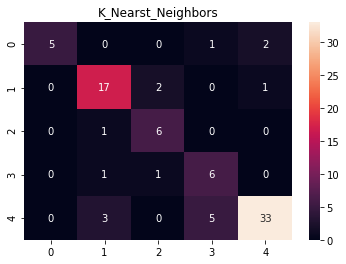

In [15]:
# Evaluation
print(classification_report(y_test, y_pred))
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, fmt='.0f').set_title('K_Nearst_Neighbors')
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average=None)
knn_recall = recall_score(y_test, y_pred, average=None)

### 4.3.2. Decision Tree

                                           precision    recall  f1-score   support

BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA       0.83      0.62      0.71         8
                  CUMPRIMENTO DE SENTENçA       0.78      0.90      0.84        20
         EXECUçãO DE TíTULO EXTRAJUDICIAL       0.78      1.00      0.88         7
                                MONITóRIA       0.67      0.50      0.57         8
                 PROCEDIMENTO COMUM CíVEL       0.90      0.88      0.89        41

                                 accuracy                           0.83        84
                                macro avg       0.79      0.78      0.78        84
                             weighted avg       0.83      0.83      0.83        84



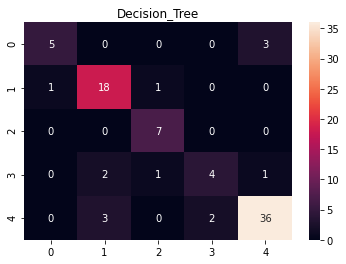

In [16]:
# Training and Prediction
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, fmt='.0f').set_title('Decision_Tree')
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average=None)
dt_recall = recall_score(y_test, y_pred, average=None)

### 4.3.3. Random Forest

                                           precision    recall  f1-score   support

BUSCA E APREENSãO EM ALIENAçãO FIDUCIáRIA       1.00      0.38      0.55         8
                  CUMPRIMENTO DE SENTENçA       0.79      0.95      0.86        20
         EXECUçãO DE TíTULO EXTRAJUDICIAL       0.86      0.86      0.86         7
                                MONITóRIA       0.60      0.75      0.67         8
                 PROCEDIMENTO COMUM CíVEL       0.88      0.85      0.86        41

                                 accuracy                           0.82        84
                                macro avg       0.82      0.76      0.76        84
                             weighted avg       0.84      0.82      0.81        84



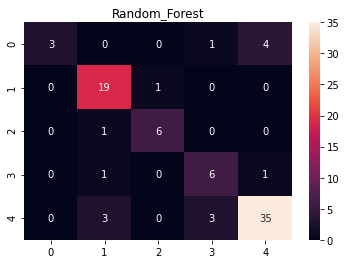

In [17]:
# Training and Prediction
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, fmt='.0f').set_title('Random_Forest')
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average=None)
rf_recall = recall_score(y_test, y_pred, average=None)

### 4.3.4. XGBoost

In [ ]:
# Training and Prediction
xgbmodel = xgb.XGBClassifier(random_state=0)
xgbmodel.fit(X_train,y_train)
y_pred=xgbmodel.predict(X_test)

# Evaluation
print(classification_report(y_test,y_pred))
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, fmt='.0f').set_title('XGBoost')
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average=None)
xgb_recall = recall_score(y_test, y_pred, average=None)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## 5. EVALUATION

In [ ]:
accuracy_table = pd.DataFrame([knn_accuracy,dt_accuracy,rf_accuracy,xgb_accuracy], 
                    columns=['Accuracy'], 
                    index=['KNN', 'Decision_Tree', 'Random_Forest', 'XGBosst'])
accuracy_table

In [ ]:
recall_table = pd.DataFrame([knn_recall,dt_recall,rf_recall,xgb_recall],
                    columns=['Recall_0', 'Recall_1', 'Recall_2', 'Recall_3', 'Recall_4'], 
                    index=['KNN', 'Decision_Tree', 'Random_Forest', 'XGBosst'])
recall_table

In [ ]:
precision_table = pd.DataFrame([knn_precision,dt_precision,rf_precision,xgb_precision],
                    columns=['Precision_0', 'Precision_1', 'Precision_2', 'Precision_3', 'Precision_4'], 
                    index=['KNN', 'Decision_Tree', 'Random_Forest', 'XGBosst'])
precision_table

In [ ]:
comparing_metrics = pd.concat([accuracy_table, recall_table, precision_table], axis=1).apply(lambda x: round(x, 2), axis=1)
comparing_metrics.T

In [ ]:
a = sns.barplot(x=comparing_metrics.index, y='Accuracy', data=comparing_metrics)
a.set_ylim([0.75, 0.85])
plt.show()